# MODELOS

## LIBRERÍAS

In [38]:
import pyarrow.parquet as pq
import pyarrow as pa
import seaborn as sns
import numpy as np

In [40]:
from statsmodels.tsa.seasonal import STL
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.ets import AutoETS

## LECTURA DE LOS DATOS

In [3]:
table_diaria = pq.read_table('/Users/aitor/Desktop/Máster Ciencia de Datos/Series temporales/Series-temporales/Practices/EXAM/Exam_data/datos_diarios.parquet')
datos_diarios = table_diaria.to_pandas()

In [4]:
table_horaria = pq.read_table('/Users/aitor/Desktop/Máster Ciencia de Datos/Series temporales/Series-temporales/Practices/EXAM/Exam_data/datos_horarios.parquet')
datos_horarios = table_horaria.to_pandas()

## DESCOMPOSICIÓN STL

STL es un método para la descomposición de series temporales. Sus siglas corresponden a *Seasonal and Trend decomposition using Loess*.

#### DATOS HORARIOS

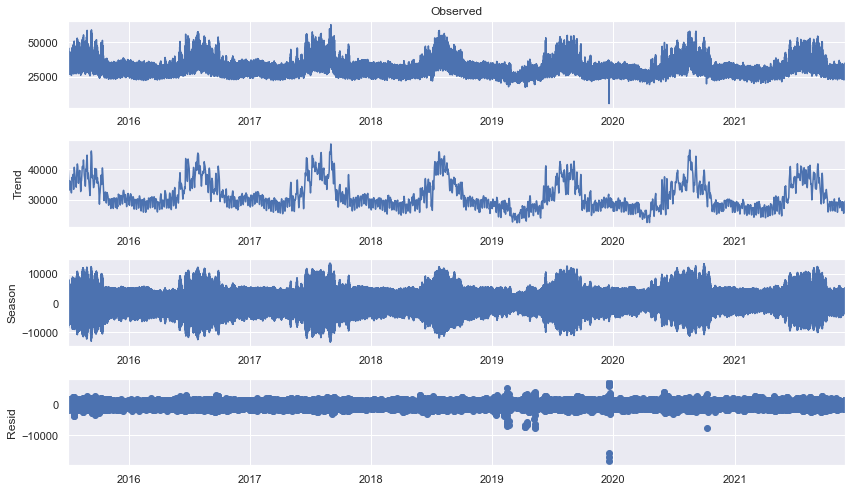

In [12]:
sns.set(rc={'figure.figsize':(12, 7)})

stl = STL(datos_horarios)
res = stl.fit()
fig = res.plot()

Podemos observar que los datos no tienen tendencia y, claramente vemos que la serie tiene componente estacional en los meses entre verano y otoño más o menos.

#### DATOS DIARIOS

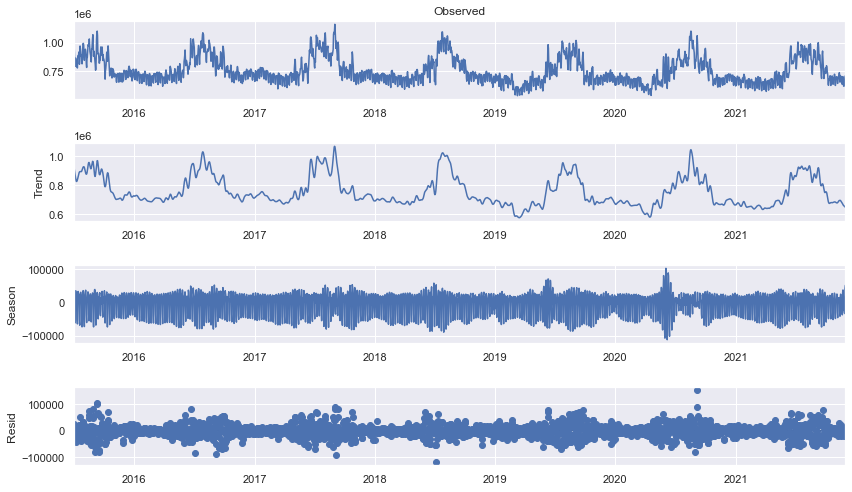

In [13]:
sns.set(rc={'figure.figsize':(12, 7)})

stl = STL(datos_diarios)
res = stl.fit()
fig = res.plot()

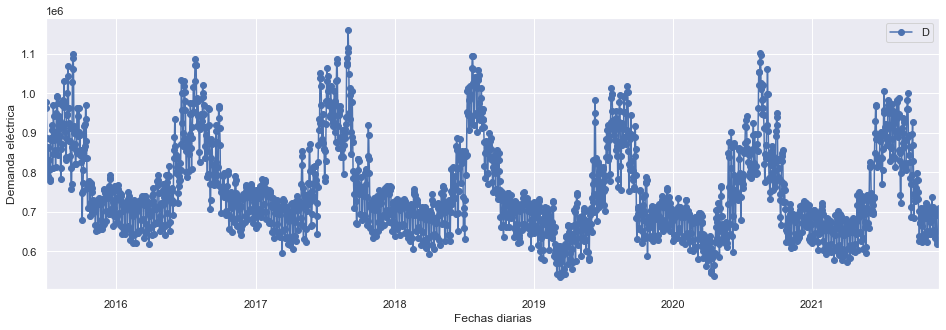

In [36]:
sns.set(rc = {"figure.figsize":(16,5)}) # Definimos el tamaño de la imagen
ax = datos_diarios.plot(marker = 'o', linestyle = '-')
ax.set_ylabel("Demanda eléctrica") # Añadimos título al eje y 
ax.set_xlabel("Fechas diarias"); # Añadimos título al eje x

Debido a que la serie se comporta de manera muy parecida año tras año, vamos a considerar los datos a partir de 2019 con el fin de reducir el número de datos.

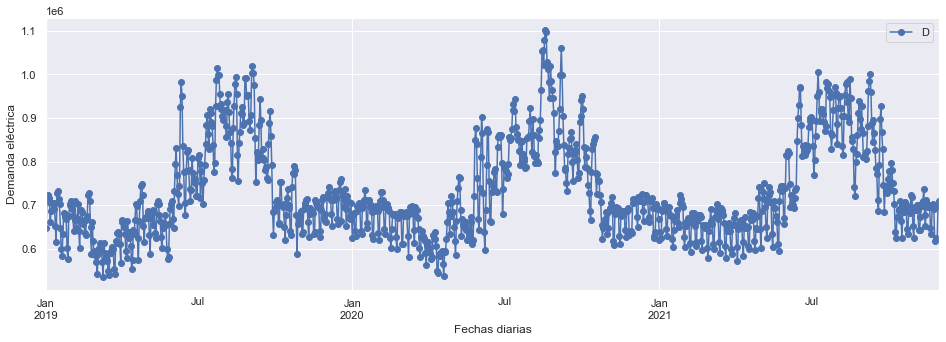

In [35]:
sns.set(rc = {"figure.figsize":(16,5)}) # Definimos el tamaño de la imagen
ax = datos_diarios["2019":].plot(marker = 'o', linestyle = '-')
ax.set_ylabel("Demanda eléctrica") # Añadimos título al eje y 
ax.set_xlabel("Fechas diarias"); # Añadimos título al eje x

## MODELO ETS

In [32]:
datos_diarios["2019":]

,D
Local date,
2019-01-01,646739
2019-01-02,713041
2019-01-03,723967
2019-01-04,715678
2019-01-05,706611
...,...
2021-11-26,625052
2021-11-27,622892
2021-11-28,622017


In [53]:
datos_diarios["2019":] = datos_diarios["2019":].to_period("D")

958 107


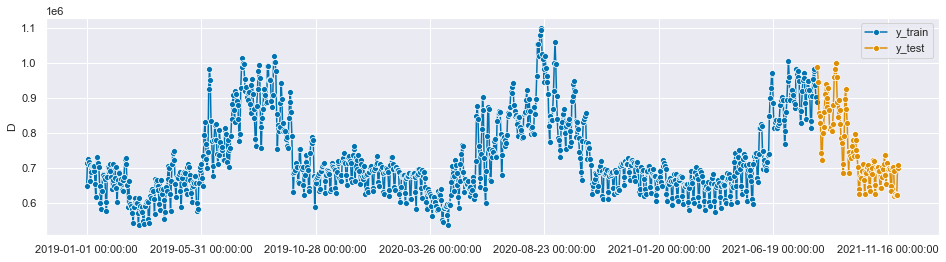

In [54]:
y_train_diario, y_test_diario = temporal_train_test_split(y = datos_diarios["2019":]["D"].astype('float64'), test_size=107)
plot_series(y_train_diario, y_test_diario, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [55]:
fh = np.arange(1, 108)
# step 3: specifying the forecasting algorithm
ETS_diario = AutoETS(auto=True, sp=365, n_jobs=-1) 

In [ ]:
ETS_diario.fit(y_train_diario)
print(ETS_diario.summary())

/Users/aitor/opt/anaconda3/envs/ML_big_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/aitor/opt/anaconda3/envs/ML_big_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/aitor/opt/anaconda3/envs/ML_big_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/aitor/opt/anaconda3/envs/ML_big_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency infor

In [ ]:
ETS_diario_pred = ETS_diario.predict(fh)
print(ETS_diario_pred)

In [ ]:
plot_series(y_train_diario, ETS_diario_pred, y_test_diario, labels=["DemElec", "DemElec pred", "DemElec real"])